#Importing the required Python libraries, frameworks and/or Modules for various Data Science tasks like


1.   Data Preprocessing
2.   Data Wrangling
3.   Data Visualization
4.   Correlation Analysis
5.   Feature Extraction
6.   Implementation of Machine Learning Models

The major libraries being used in our task will be 


1.   NumPy (For Numeric Computation)
2.   Pandas (For Data wrangling/data preprocessing/data integration/ EDA purpose)
3.   Matplotlib and Seaborn (For Data Visualization)
4.   Scikit Learn (For Machine Learning Model implementation)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading data from the repository. We mostly dealt with CSV (short for "Comma Seperated Values") file format which are first uploaded on Google Drive (A cloud storage) and accessed from the drive directly in Google Colab Notebook.

##Note:
### We also need to store the data we read in some variable for easy access throughout the process.

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining Class/Shallow Learning/data.csv')

##Look at following parameters for gaining instant general info of your data.


1.   Overall shape of data to know how many number of "Rows" and "Columns" exist. Note that the first value will show No. of Rows and the second value will represent the No. of Columns. Example (122 , 32) means there are 122 Rows and 32 Columns.
2.   The "head" of data set to observe the "Attribute Names" and the "type of values" stored in each attribute as they give us useful technical information about our dataset like


*   Some Attribute names are self explainatory and give us a quick idea of knowledge/information being stored in that specific attribute
*   The type of values in our attributes tell us about "Data Types"; as it it very significant to know that our Machine Learning models only train on numeric data and not on any other data type like string/object data type. So if there is an attribute with string/object data type we need to first convert it into numeric/int64 data type or if it has no significant impact on our data analysis then we can discard/drop that attribute.


3.  General Statistical Description of data to know basic stats measures like Standard Deviation, Five Number Summary (which include min, max, Q1, Q2/median, Q3) and the Count (Total number of values stored in that specific attribute). One important thing to keep in mind is that that Satistical Descriptions will be performed only on numeric data and not on attributes whose data type is object/string as we do not get all the statistical measures (especially the "Measures of Central Tendencies) for such attributes.


In [8]:
df.shape

(569, 33)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


##Check the data types of each column and if we will find any object(string) data type we will first convert it into float as "OUR MODEL IS TRAINED AND TESTED ON NUMERIC DATA ONLY" - if you will try to fit a model on string/object data type it will simply throw an error.

In [11]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

##We found that our 'y' variable which is our 'DEPENDENT VARIABLE' is of object data type so we will first convert it into float data type or numeric values. We will convert it into coded categories.

In [12]:
for col in df.columns:
    if str(df[col].dtype) is "object":
        df[col] = df[col].astype("category").cat.codes

##Detecting and handling Missing Values. We need to handle the missing values as we need consistant data for better data analysis as well as the performance of ML models increase exponentially.

### To find the null values we can use any of the two the syntaxes "isnull().sum()" or "isnull().any().any()"

### "isnull().sum()" - will display the amount of null values in each attribute

### "isnull().any().any()" - will generate a boolean result. if there are any "null" value/s in whole data set, it will spill "True" otherwise the output will be "False"


In [13]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## As observed; that the last column ("Unnamed: 32"), comprises of no record so we will simply drop the whole column as it will have no impact on our data analysis and we cannot preprocess it. We also know that "id" column has nothing to do with our predictions as information like serial number, roll number id has almost zero impact on the data analysis, so we will drop it too.

### We use "drop()" for this purpose and we use attribute "inplace = True" to permanently drop the column. 
###Attribute "axis=0" marks "Rows" and the attribute "axis = 1" marks "Columns". Also notice that by default in Pandas the attribute "axis=0" which means if we want to index through axis if we mention "axis=0" or do not mention it, Pandas will by default index through rows as it is set as by default attribute value. But, for columns we need to mention "axis=1".

In [14]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [15]:
df.isnull().any().any()

False

In [16]:
df.shape

(569, 31)

In [17]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


#Step#6
## Splitting our Independent and Dependent variables and storing them in 'x' and 'y' variables.

In [18]:
x = df.iloc[ : , 1:] # independent variables
y = df.iloc[ : , 0] # Dependent variables

In [19]:
x.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [20]:
y.head(2)

0    1
1    1
Name: diagnosis, dtype: int8

### Checking how many class labels we got using ".unique()" function. This only works for a single attribute. So, you need to check unique values of any or all attributes seperately

In [21]:
print(y.unique())

[1 0]


#Step#7
##Detecting and *handling* "OUTLIERS"

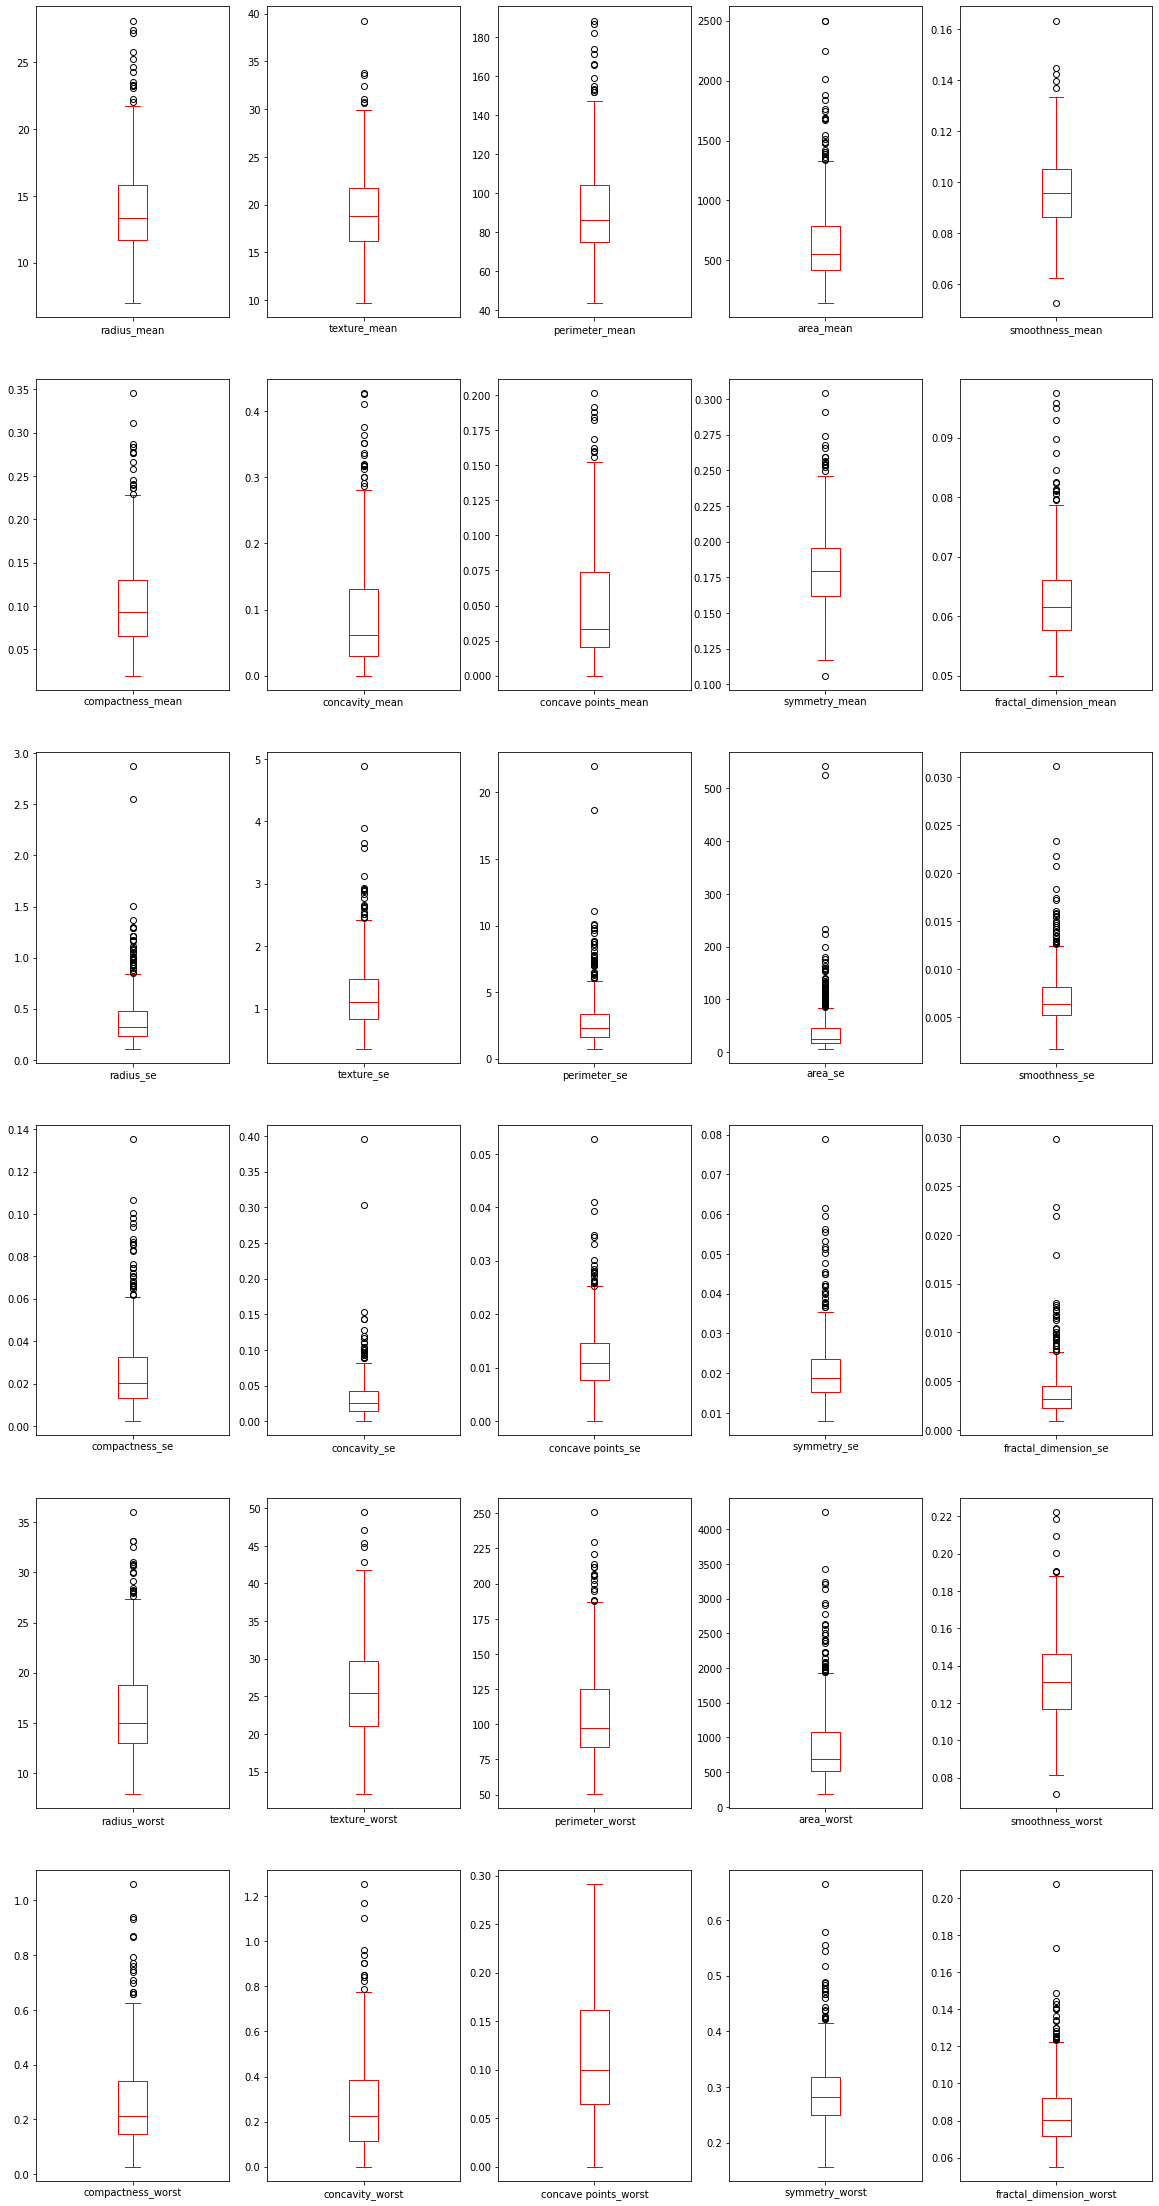

In [22]:
x.plot(kind = 'box', figsize = (20,40), subplots = True, layout = (6,5), sharex = False, sharey = False, color = 'r')
plt.show()

### I generated my own Outlier Handling code using Python as we are using Python libraries for all the Data Science tasks. The code basically iterates through each column one by one and then it will iterate through each row and if there is any upper or lower outlier it will replace it with the median value. Remeber we donot replace it with mean value as mean is sensitive to extreme values which are the utliers. So, for a better preprocessing we replace it with the median value.

In [23]:
a=0
for i in range(len(x.columns)):  
  Q1 = np.percentile(x.iloc[:, a], 25)
  Q3 = np.percentile(x.iloc[:, a], 75)
  IQR = (Q3-Q1)
  Lower = Q1 - (1.5*IQR)
  Upper = Q3 + (1.5*IQR)
  for u in range(len(x.iloc[:, a])):
    if x.iloc[:, a][u]>Upper:
      x.iloc[:, a][u] = x.iloc[:, a].median()
    if x.iloc[:, a][u]<Lower:
      x.iloc[:, a][u] = x.iloc[:, a].median()
  a=a+1

### Visually rechecking again if our code actually performed the task of outlier handling. From the visualization it appears that it actually handled the Outliers very effectively.

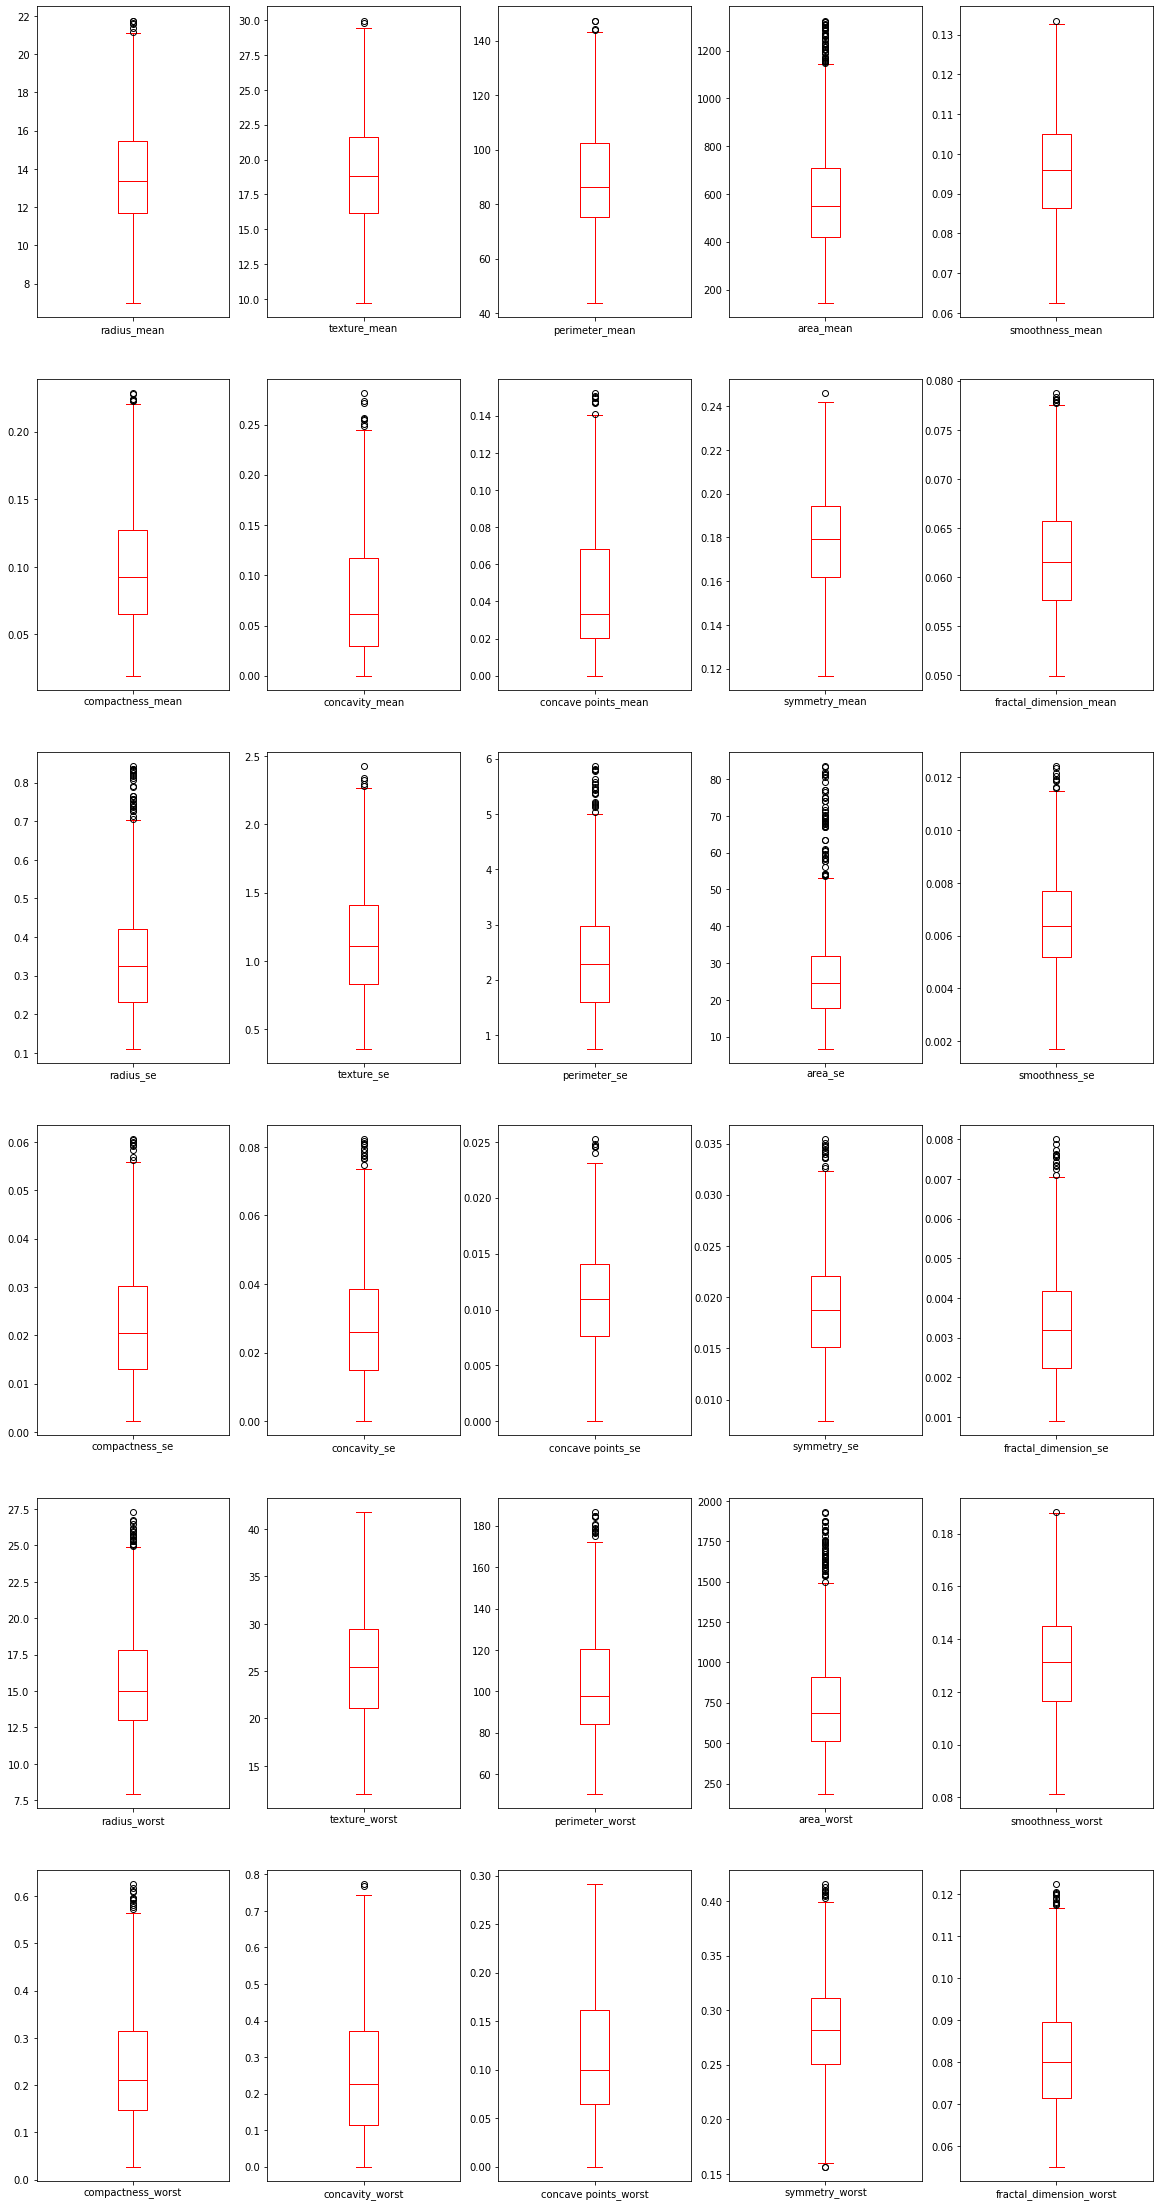

In [24]:
x.plot(kind = 'box', figsize = (20,40), subplots = True, layout = (6,5), sharex = False, sharey = False, color = 'r')
plt.show()

#Data Normalization:

## We perform data normalization as the normalization shrinks our values within a specific range and our ML models' performance increases exponentially when the data is normalized.

## Also remember that the StandardScalar sub-module in Sklearn's preprocessing module uses the "Z-Score" normalization method to normalize the data.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [27]:
scaled_data

array([[ 1.33570554e+00, -2.18354489e+00,  1.52689986e+00, ...,
         2.29607613e+00,  2.57049299e-03,  2.73907966e+00],
       [ 2.16871316e+00, -3.36097614e-01,  1.99915074e+00, ...,
         1.08708430e+00, -1.52066742e-01,  5.48992791e-01],
       [ 1.88458653e+00,  5.33877558e-01,  1.86355396e+00, ...,
         1.95500035e+00,  1.70143233e+00,  4.43446436e-01],
       ...,
       [ 8.86914619e-01,  2.24132883e+00,  8.48915927e-01, ...,
         4.14068691e-01, -1.29466409e+00, -2.44070794e-01],
       [ 2.17839930e+00,  2.55381991e+00,  2.33580484e+00, ...,
         2.28998549e+00,  2.71946079e+00, -1.09206006e-01],
       [-1.96726652e+00,  1.35635409e+00, -1.97430270e+00, ...,
        -1.74506282e+00,  1.07809722e-01, -8.16513178e-01]])

In [28]:
scaled_data.shape

(569, 30)

##Feature Extraction using Correlation and "PCA" (short for Principal Component Analysis). 

###Correlation technique tells us the correlation b/w the features and the features with max correlations have the same impact on Data Analysis. So, we can keep only one feature and discard all the other highly correlated features as their impact will be the same. 
### Also notice that the visual representation of correlation using "Heat Maps" make it easy and speedy to find the features that are highly correlated; based on the color schemes that are visible on the color strip on the extreme right of the "Heat Map". 
### Correlation values exisit in a range b/w "-1" & "+1". Where, "+1" means the features are highly correlated and "-1" means no correlation b/w the attributes. The heat map color strip shows color transition b/w "+1" and "-1". So the color at "+1" will represent "Max Correlation" and the color near to "-1" will show the "Minmum Correlation". This is the reason that visual representation of Heat Maps make it easy to find the correlation b/w features with extreme ease and speedily.

In [29]:
x.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.297450,0.990388,0.925183,0.134733,0.418415,0.621403,0.740455,0.132020,-0.291880,0.517181,-0.106589,0.511161,0.577298,-0.208614,0.250128,0.338667,0.358862,-0.227185,0.014393,0.930719,0.280416,0.917450,0.852725,0.126910,0.401652,0.537007,0.668829,0.169131,0.036917
texture_mean,0.297450,1.000000,0.306341,0.304004,0.011413,0.206553,0.306155,0.276335,0.110478,-0.054933,0.286206,0.395589,0.297201,0.285271,0.084222,0.216701,0.248919,0.174798,0.014917,0.141075,0.326576,0.889947,0.335671,0.336433,0.079430,0.217494,0.295744,0.289420,0.073535,0.075097
perimeter_mean,0.990388,0.306341,1.000000,0.917086,0.175317,0.470486,0.663313,0.780306,0.163690,-0.242107,0.518564,-0.102293,0.519875,0.572603,-0.192656,0.289882,0.375457,0.389469,-0.215520,0.055679,0.926143,0.286190,0.918474,0.849714,0.156473,0.445448,0.575157,0.703813,0.187058,0.082742
area_mean,0.925183,0.304004,0.917086,1.000000,0.124536,0.385097,0.582934,0.698441,0.136279,-0.265945,0.549881,-0.089116,0.541636,0.573579,-0.166855,0.242401,0.327788,0.342396,-0.178042,0.029059,0.914024,0.281121,0.903599,0.893200,0.128577,0.377399,0.496747,0.619108,0.184986,0.046264
smoothness_mean,0.134733,0.011413,0.175317,0.124536,1.000000,0.589446,0.450713,0.511779,0.501243,0.543470,0.271082,0.098544,0.266190,0.206794,0.295467,0.337349,0.295872,0.401966,0.099525,0.365385,0.210134,0.067429,0.223290,0.159948,0.756239,0.429343,0.386831,0.501998,0.353448,0.445208
compactness_mean,0.418415,0.206553,0.470486,0.385097,0.589446,1.000000,0.807705,0.740219,0.490840,0.426861,0.382798,0.033755,0.456209,0.338465,0.121148,0.679455,0.634853,0.642245,0.034277,0.505902,0.467631,0.195605,0.508520,0.440196,0.486388,0.781601,0.730658,0.748489,0.370773,0.592906
concavity_mean,0.621403,0.306155,0.663313,0.582934,0.450713,0.807705,1.000000,0.870276,0.407098,0.216102,0.463597,0.035112,0.525562,0.463118,0.078010,0.572463,0.676935,0.633351,-0.052073,0.378112,0.639884,0.308581,0.662796,0.575046,0.426021,0.676004,0.806611,0.806516,0.328261,0.425395
concave points_mean,0.740455,0.276335,0.780306,0.698441,0.511779,0.740219,0.870276,1.000000,0.412479,0.150496,0.536972,-0.014561,0.558099,0.497879,0.041513,0.490874,0.569296,0.617922,-0.054324,0.317448,0.749525,0.275610,0.772145,0.683270,0.434366,0.611878,0.722839,0.859304,0.323952,0.362483
symmetry_mean,0.132020,0.110478,0.163690,0.136279,0.501243,0.490840,0.407098,0.412479,1.000000,0.383097,0.278264,0.115262,0.278989,0.184336,0.162394,0.350659,0.274103,0.296473,0.265164,0.336832,0.202741,0.128991,0.222914,0.174505,0.396503,0.368179,0.365393,0.388663,0.609605,0.343313
fractal_dimension_mean,-0.291880,-0.054933,-0.242107,-0.265945,0.543470,0.426861,0.216102,0.150496,0.383097,1.000000,-0.042532,0.120874,0.036858,-0.096237,0.284506,0.373979,0.241467,0.245228,0.206042,0.588177,-0.192749,-0.032572,-0.152937,-0.196302,0.479360,0.350110,0.235052,0.146054,0.243892,0.657318


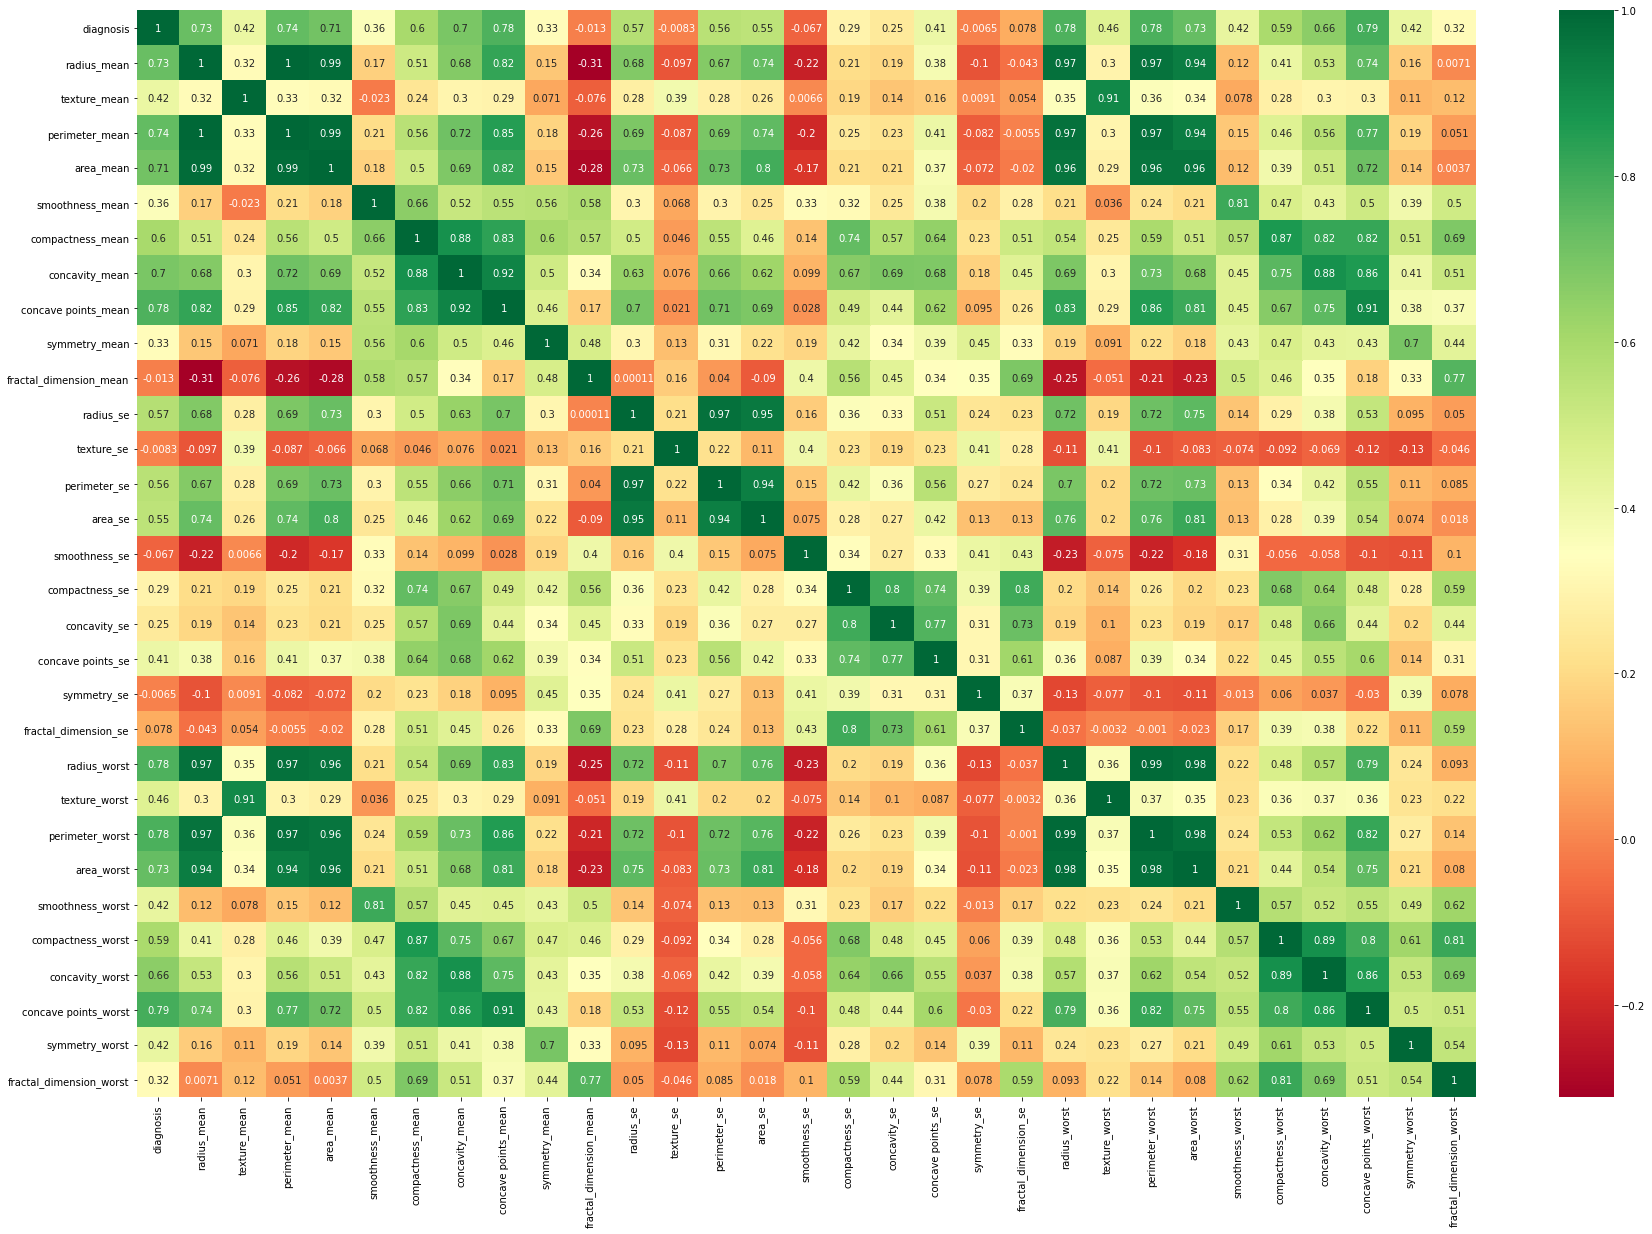

In [30]:
plt.figure(figsize=(30,20))
x = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

## PCA implementation:

### PCA is a technique of "Feature Engineering" in which we get the features that are most significat. Remember that PCA donot drop the attributes but it compresses them. This is the reason that the over all impact is not compromised. Because of this reason we consider PCA as the best Feature Engineering technique and is most widely used by the data scientists compared to other techniques. Although other useful Feature engineering techniques like "Chi Square" and numerous other techniques also exist.


In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)

In [33]:
x_pca = pca.fit_transform(scaled_data)

In [34]:
scaled_data.shape

(569, 30)

In [35]:
x_pca.shape

(569, 2)

Text(0, 0.5, '2nd Principal Component')

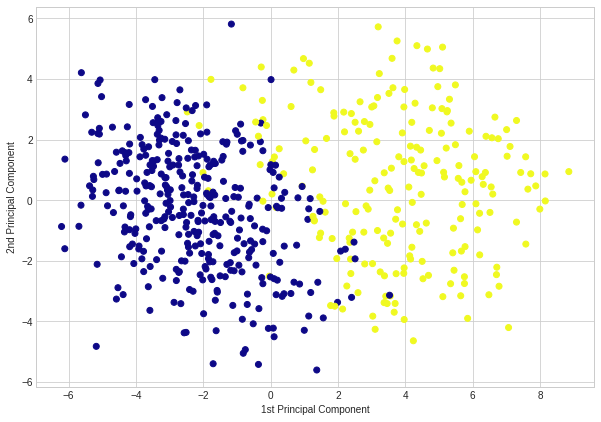

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(x_pca[ : , 0], x_pca[ : , 1], c = df['diagnosis'], cmap='plasma')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

##Splitting data into Train-Test Split. We split our data set into test-train split to check ML model's accuracy and performance. We train our model on test data and then test it's performance on the train data which was not fed to the ML algorithm before. This gives us an overview of how good our model was trained and how high are the chances that it will perform on real world data. Although we perform t-Test (aka Null Hypothesis) before deploying our ML models in real world to be sure that that it will give us same high performance in real world senarios.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=4)

#Implementing MAchine Learning models:
## Basically there are 4 type of Machine Learning techniques

1.   Supervised Learning
2.   Unsupervised Learning
3.   Semi Supervised Learning
4.   Reinforcement Learning

### In Supervised Learning we feed our M.L algorithms with "Class Labels". Commonly used Supervised M.L algorithms are Classification and Regression Algorithms
### In Unsupervised Learning we do not feed our models the "Class Labels". Commonly used Unsupervised M.L algorithms are Clustering algorithms.

### As we will use only Classification and Clustering algorithms. So, we will not go in details of other M.L techniques here.

# Classification Models

#1- Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8771929824561403


In [42]:
y_test.shape

(114,)

In [43]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[68, 12],
       [ 2, 32]])

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.8635897435897436
0.8493506493506493
0.8955882352941176


## 2- Implementing Naive Bayes M.L Model

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


In [48]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[73,  7],
       [ 1, 33]])

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.91997191997192
0.9057432432432433
0.9415441176470588


#3- Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8859649122807017


In [53]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[68, 12],
       [ 1, 33]])

In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.8740973579135163
0.8594202898550725
0.9102941176470588


## 4- KNN 

```
# This is formatted as code
```



In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8859649122807017


In [58]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[68, 12],
       [ 1, 33]])

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.8740973579135163
0.8594202898550725
0.9102941176470588


#5- SVM

In [60]:
from sklearn import svm

In [61]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8859649122807017


In [63]:
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[68, 12],
       [ 1, 33]])

In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.8740973579135163
0.8594202898550725
0.9102941176470588


# Clustering model implementation

#1- K-means

In [65]:
from sklearn.cluster import KMeans

In [66]:
kmean = KMeans(2)
KMmodel = kmean.fit(x_pca)

In [67]:
KMmodel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

##2- Hirarchical 

In [68]:
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [69]:
np.set_printoptions (precision=4, suppress=True)
plt.figure(figsize=(10,5))
# %
plt.style.use('seaborn-whitegrid')

<Figure size 720x360 with 0 Axes>

In [70]:
z = linkage(x_pca, 'ward')

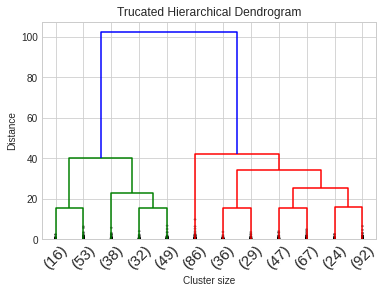

In [71]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True) 
plt.title('Trucated Hierarchical Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

### Distance measure = Euclidean
### Centroid = Min

In [72]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'ward')

Hclustering.fit(x_pca)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [73]:
sm.accuracy_score(y, Hclustering.labels_)

0.9191564147627417

### Distance measure = Euclidean
### Centroid = Max

In [74]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'complete')

Hclustering.fit(x_pca)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [75]:
sm.accuracy_score(y, Hclustering.labels_)

0.11775043936731107

### Distance measure = Euclidean
### Centroid = Mean

In [76]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage= 'average')

Hclustering.fit(x_pca)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [77]:
sm.accuracy_score(y, Hclustering.labels_)

0.9156414762741653

### Distance measure = Manhatton
### Centroid = Mean

In [78]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage= 'average')

Hclustering.fit(x_pca)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [79]:
sm.accuracy_score(y, Hclustering.labels_)

0.9226713532513181